# ML6: Convolutional Neural Networks
- Name: Gelli Mae Gloria
- Date: January 20, 2021
- Student Number: 2015-06435

### Preliminaries
Import all important packages from Python for the CNN: 

In [2]:
import os
import numpy as np
import pandas as pd
import random
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers, preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

C:\Users\Gelli Mae Gloria\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Gelli Mae Gloria\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Gelli Mae Gloria\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Gelli Mae Gloria\Anaconda3\lib\site-packages\tensorflow\python\f

### Cats and Dogs Dataset


In [3]:
def label_image(filenames):

    categories = []
    for filename in filenames:
        category = filename.split('.')[0]
        if category == 'cat':
            categories.append(1)
        else:
            categories.append(0)

    df = pd.DataFrame({'filename': filenames, 'category': categories}, columns=['filename','category'])
    
    return df

In [45]:
PATH = "E:/Acaaaaads/App Physics 186/ML6/train/"
filenames = os.listdir(PATH)

files = label_image(filenames)

In [46]:
#image count
print(files['category'].value_counts())

1    12500
0    12500
Name: category, dtype: int64


(200, 186)


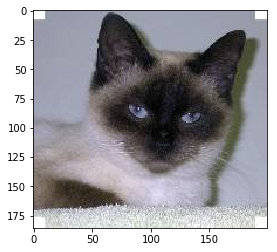

In [6]:
#random image
sample = random.choice(filenames)
image = load_img(PATH+sample)
print(image.size)
plt.imshow(image)

In [7]:
def data_image(PATH, FILE_LIST, IMG_SIZE, LABEL):
    
    categories = []
    images = []
    
    for filename in FILE_LIST:
        
        #create label 1==cat, 0==dog
        categories.append(LABEL)
            
        #convert image to array
        img = Image.open(PATH+filename)
        img = img.resize(IMG_SIZE)
        np_img = np.array(img)
        images.append(np_img)
        
    return images, categories

In [8]:
TRAIN_SAMPLE, IMG_SIZE = 2500, (125,167)
CAT_TRAIN = filenames[:TRAIN_SAMPLE]
DOG_TRAIN = filenames[-TRAIN_SAMPLE:]

X_train_cat, y_train_cat = data_image(PATH,CAT_TRAIN,IMG_SIZE,1)
X_train_dog, y_train_dog = data_image(PATH,DOG_TRAIN,IMG_SIZE,0)

In [9]:
x_train_set = np.concatenate([X_train_cat,X_train_dog])
y_train_set = np.concatenate([y_train_cat,y_train_dog])

print("x-train shape:",x_train_set.shape)
print("y-train shape:",y_train_set.shape)

x-train shape: (5000, 167, 125, 3)
y-train shape: (5000,)


In [10]:
VALID_SAMPLE = 500
CAT_VALID = filenames[(TRAIN_SAMPLE+1):(TRAIN_SAMPLE+VALID_SAMPLE+1)]
DOG_VALID = filenames[12500:12500+VALID_SAMPLE]

X_valid_cat, y_valid_cat = data_image(PATH,CAT_VALID,IMG_SIZE,1)
X_valid_dog, y_valid_dog = data_image(PATH,DOG_VALID,IMG_SIZE,0)

In [11]:
x_valid_set = np.concatenate([X_valid_cat,X_valid_dog])
y_valid_set = np.concatenate([y_valid_cat,y_valid_dog])
names = np.concatenate([CAT_VALID, DOG_VALID])

print("x-train shape:",x_valid_set.shape)
print("y-train shape:",y_valid_set.shape)

x-train shape: (1000, 167, 125, 3)
y-train shape: (1000,)


### Train our Neural Networks
We first see how good a normal multilayer perceptron (MLP) is in this task

In [12]:
total_pixels = IMG_SIZE[0] * IMG_SIZE[1] * 3
fc_size = 512

inputs = keras.Input(shape=(IMG_SIZE[1], IMG_SIZE[0], 3), name='ani_image')
x = layers.Flatten(name = 'flattened_img')(inputs) #turn image to vector.

x = layers.Dense(fc_size, activation='relu', name='first_layer')(x)
outputs = layers.Dense(1, activation='sigmoid', name='class')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

Instructions for updating:
Colocations handled automatically by placer.


In [52]:
customAdam = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="mean_squared_error",
              # List of metrics to monitor
              metrics=["binary_crossentropy","mean_squared_error"])
              
print('# Fit model on training data')

history = model.fit(x_train_set, 
                    y_train_set, 
                    batch_size=30, 
                    shuffle = True, #important since we loaded cats first, dogs second.
                    epochs=2,
                    validation_data=(x_valid_set, y_valid_set))

# Fit model on training data
Train on 5000 samples, validate on 1000 samples
Epoch 1/2
5000/5000 [==============================] - 105s 21ms/sample - loss: 0.5000 - binary_crossentropy: 7.9712 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 7.9712 - val_mean_squared_error: 0.5000
Epoch 2/2
5000/5000 [==============================] - 94s 19ms/sample - loss: 0.5000 - binary_crossentropy: 7.9712 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 7.9712 - val_mean_squared_error: 0.5000


In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ani_image (InputLayer)       (None, 167, 125, 3)       0         
_________________________________________________________________
flattened_img (Flatten)      (None, 62625)             0         
_________________________________________________________________
first_layer (Dense)          (None, 512)               32064512  
_________________________________________________________________
class (Dense)                (None, 1)                 513       
Total params: 32,065,025
Trainable params: 32,065,025
Non-trainable params: 0
_________________________________________________________________


## 1-Layer Convolutional Neural Network
Instead of only the Fully Connected layer and the output layer like the neural networks that we know, here, we have more layers. Below is the network:

**Input --> Convolution Layer --> Pooling Layer --> Fully Connected Layer --> Output**

In [54]:
fc_layer_size = 128

conv_inputs = keras.Input(shape=(IMG_SIZE[1], IMG_SIZE[0], 3), name='ani_image')

conv_layer = layers.Conv2D(24, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_x = layers.Flatten(name = 'flattened_features')(conv_layer) #turn image to vector.

conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)

conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

In [55]:
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ani_image (InputLayer)       (None, 167, 125, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 165, 123, 24)      672       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 82, 61, 24)        0         
_________________________________________________________________
flattened_features (Flatten) (None, 120048)            0         
_________________________________________________________________
first_layer (Dense)          (None, 128)               15366272  
_________________________________________________________________
second_layer (Dense)         (None, 128)               16512     
_________________________________________________________________
class (Dense)                (None, 1)                 129       
Total para

In [56]:
customAdam = keras.optimizers.Adam(lr=0.1e-6)
conv_model.compile(optimizer=customAdam,  
              # Loss function to minimize
              loss="binary_crossentropy",
              # List of metrics to monitor
              metrics=["binary_crossentropy","mean_squared_error"])

In [57]:
print('# Fit model on training data')

history = conv_model.fit(x_train_set, 
                    y_train_set, 
                    batch_size=30, 
                    shuffle = True,
                    epochs=10,
                    validation_data=(x_valid_set, y_valid_set))

# Fit model on training data
Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 107s 21ms/sample - loss: 5.9767 - binary_crossentropy: 5.9767 - mean_squared_error: 0.4717 - val_loss: 5.2951 - val_binary_crossentropy: 5.2951 - val_mean_squared_error: 0.4558
Epoch 2/10
5000/5000 [==============================] - 98s 20ms/sample - loss: 4.9409 - binary_crossentropy: 4.9409 - mean_squared_error: 0.4494 - val_loss: 4.6666 - val_binary_crossentropy: 4.6666 - val_mean_squared_error: 0.4470
Epoch 3/10
5000/5000 [==============================] - 98s 20ms/sample - loss: 4.3437 - binary_crossentropy: 4.3437 - mean_squared_error: 0.4333 - val_loss: 4.2798 - val_binary_crossentropy: 4.2798 - val_mean_squared_error: 0.4328
Epoch 4/10
5000/5000 [==============================] - 97s 19ms/sample - loss: 4.0198 - binary_crossentropy: 4.0198 - mean_squared_error: 0.4201 - val_loss: 4.0731 - val_binary_crossentropy: 4.0732 - val_mean_squared_error: 0

### Accuracy Measurement & Visualizations
#### A. Loss functions
We now look at how well the 1-Layer CNN we have implemented performed. Here, we will see plots of the loss functions as performance monitoring between each epoch.

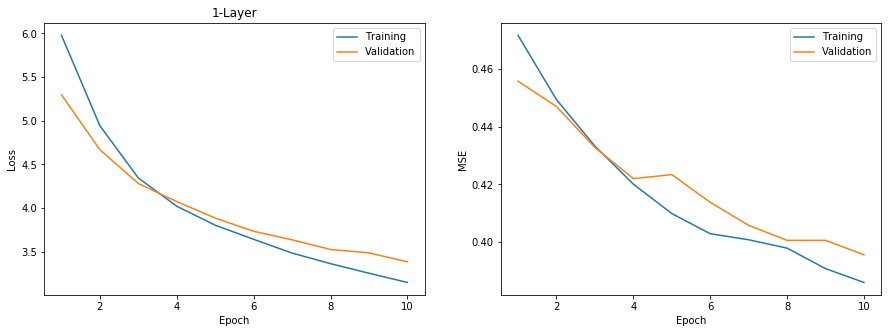

In [58]:
epoch = [i for i in range(1,11)]
loss_train = [5.9767, 4.9409, 4.3437, 4.0198, 3.8031, 3.6413, 3.4839, 3.3626, 3.2533,3.1476]
mse_train = [0.4717, 0.4494, 0.4333, 0.4201, 0.4099, 0.4029, 0.4008, 0.3979, 0.3908, 0.3860]
loss_val = [5.2951,4.6666, 4.2798, 4.0732, 3.8845,3.7334, 3.6354, 3.5249, 3.4864, 3.3834]
mse_val = [0.4558, 0.4470, 0.4328, 0.4220, 0.4234, 0.4138, 0.4058, 0.4006, 0.4006, 0.3956]

fig, ax = plt.subplots(1,2, figsize = (15,5))

ax[0].plot(epoch,loss_train, label = 'Training')
ax[0].plot(epoch,loss_val, label = 'Validation')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].set_title('1-Layer')

ax[1].plot(epoch,mse_train, label = 'Training')
ax[1].plot(epoch,mse_val, label = 'Validation')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('MSE')
ax[1].legend()

plt.savefig('ML6_1layer_costfunction_mse_ 10_epochs.png')

#### B. Accuracy Measurement
The calculation of accuracy made use of different 'thresholds.' From [1], the accuracy is measured by the following scenario: “If the model predicts a value higher than some threshold *t*, then predict *cat*. Else predict *dog*.”

In [59]:
preds = conv_model.predict(x_valid_set).flatten()
np.corrcoef(preds, y_valid_set.flatten())

array([[1.        , 0.14075453],
       [0.14075453, 1.        ]])

In [60]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted, threshold):
    output = pd.DataFrame([actual, predicted], index = ['Actual', 'Predicted']).T
    true_pos = output[(output.Predicted > threshold) & (output.Actual == 1)]
    true_neg = output[(output.Predicted < threshold) & (output.Actual == 0)]
    correct = len(true_pos) + len(true_neg)

    return correct / float(len(actual)) * 100.0

In [61]:
for i in range(1,10):
    print('If threshold = %.2f, Accuracy = %.3f' %(0.1*i, accuracy_metric(y_valid_set, preds, 0.1*i))+'%')

If threshold = 0.10, Accuracy = 56.900%
If threshold = 0.20, Accuracy = 56.500%
If threshold = 0.30, Accuracy = 56.700%
If threshold = 0.40, Accuracy = 56.500%
If threshold = 0.50, Accuracy = 56.600%
If threshold = 0.60, Accuracy = 56.500%
If threshold = 0.70, Accuracy = 57.000%
If threshold = 0.80, Accuracy = 56.700%
If threshold = 0.90, Accuracy = 55.500%


#### D. Classification Results
Let's see some of the images with their corresponding probabilities as cats.

In [62]:
def images_g(image, ys, preds):
    """Plot clusters given the design matrix and cluster labels"""
    k_max = len(image) + 1
    k_mid = k_max//3
    fig, ax = plt.subplots(3, k_max//3,figsize=(15,5),gridspec_kw=dict(wspace=0.05),subplot_kw=dict(aspect='equal') ,dpi=200)
#     plt.subplots_adjust(bottom=0)
    for k, y in zip(range(0, k_max+1), image):
        if k < k_mid:
            ax[0][k].imshow(image[k])
            ax[0][k].set_title("Cat Percent = " + str(preds[ys[k]]*100) + '%', fontsize = 8)
            ax[0][k].set_axis_off()
            
        elif k < k_mid+4:
            ax[1][k-k_mid].imshow(image[k])
            ax[1][k-k_mid].set_title("Cat Percent = " + str(preds[ys[k]]*100)+'%', fontsize = 8)
            ax[1][k-k_mid].set_axis_off()
        else:
            ax[2][k-2*k_mid].imshow(image[k])
            ax[2][k-2*k_mid].set_title("Cat Percent = " + str(preds[ys[k]]*100)+'%', fontsize = 8)
            ax[2][k-2*k_mid].set_axis_off()
    return ax

[482, 520, 132, 597, 98, 390, 660, 390, 552, 507, 909, 345]


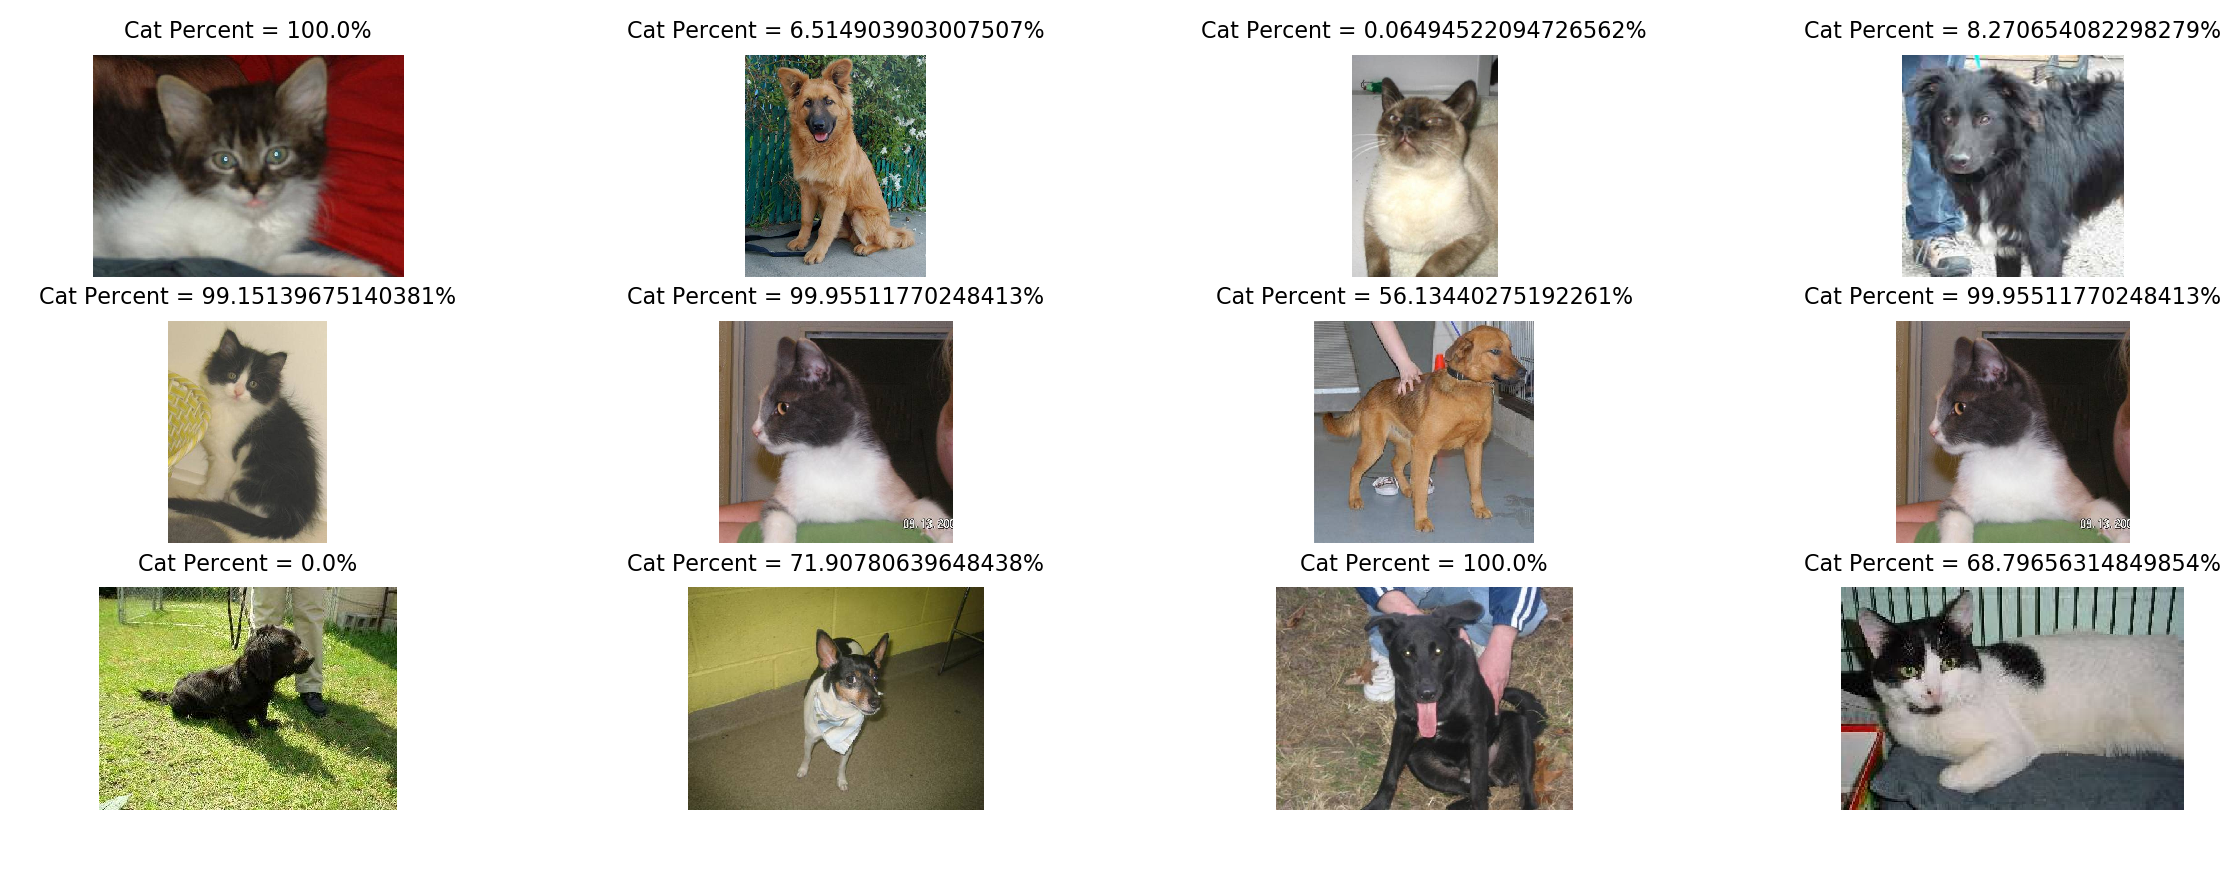

In [63]:
index_rand = []
image = []
my_image = []
fname = []
for i in range(12):
    index = random.choice(range(x_valid_set.shape[0]))
    index_rand.append(index)
    my_image.append(names[index])
    
    fname.append("E:/Acaaaaads/App Physics 186/ML6/train/" + my_image[i])
    image.append(np.array(plt.imread(fname[i])))
#     predict_image(x_valid_set,preds,index)
print(index_rand)
images_g(image, index_rand, preds)
plt.savefig('ML6_1lCNN_classification_result_10_epoch.png')

#### D. Confusion Matrix
We also visualize the performance of our classifier using a *confusion matrix*. According to reference [2], this is "a much better way to evaluate the performance of a classifier." In this matrix, we will know how many instances of each class are classified as their true class or not. The first row considers class 0 or the *negative class*, the dog class while the secod row includes the class 1 (*positive class*) which are the cats. 
 - `true negative:` (first row, first column) number of correctly classified non-cats (dogs)
 - `false positive:` (first row, second column) number of wrongly classified cats
 - `false negative:` (second row, first column) number of wrongly classified non-cats (dogs)
 - `true positive:` (second row, second column) number of correctly classified cats


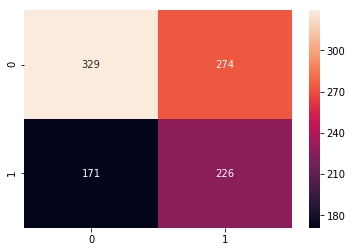

In [65]:
from sklearn.metrics import confusion_matrix

# confusion_matrix(preds, y_valid_set)
data = pd.DataFrame(preds)
data = data.rename(columns = {0:'preds'})
data['actual'] = y_valid_set

pred = np.array(data[['preds']])
actual = np.array(data[['actual']])
actual = actual.reshape(1000,)
pred = pred.reshape(1000,)
pred0 = (pred>0).astype(int)
pred1 = (pred>0.5).astype(int)
pred2 = (pred>0.9).astype(int)

# fig, ax = plt.subplots(1,3, figsize = (15,5))

sns.heatmap(confusion_matrix(pred2, actual), annot=True, fmt='g')
plt.savefig('ML6_1lCNN_th_0.9_10 epoch.png')

## 2-Layer Convolutional Neural Network
For this case, we have additional Convolution and Pooling layers. Below is the network:

**Input --> Convolution Layer --> Pooling Layer --> Convolution Layer --> Pooling Layer --> Fully Connected Layer --> Output**

In [32]:
fc_layer_size = 256

conv_inputs = keras.Input(shape=(IMG_SIZE[1], IMG_SIZE[0], 3), name='ani_image')
conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_layer)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_x = layers.Flatten(name = 'flattened_features')(conv_layer) #turn image to vector.

conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)

conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)
customAdam = keras.optimizers.Adam(lr=0.001)
# model = models.Sequential()

# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="binary_crossentropy",
              # List of metrics to monitor
              metrics=["binary_crossentropy","mean_squared_error"])
              
print('# Fit model on training data')

history = model.fit(x_train_set, 
                    y_train_set, 
                    batch_size=64, 
                    shuffle = True, #important since we loaded cats first, dogs second.
                    epochs=5,
                    validation_data=(x_valid_set, y_valid_set))
                    
#Train on 4096 samples, validate on 2048 samples
#loss: 0.5000 - binary_crossentropy: 8.0590 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 8.0591 - val_mean_squared_error: 0.5000

# Fit model on training data
Train on 5000 samples, validate on 1000 samples
Epoch 1/5
5000/5000 [==============================] - 50s 10ms/sample - loss: 0.5000 - binary_crossentropy: 7.9712 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 7.9712 - val_mean_squared_error: 0.5000
Epoch 2/5
5000/5000 [==============================] - 48s 10ms/sample - loss: 0.5000 - binary_crossentropy: 7.9712 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 7.9712 - val_mean_squared_error: 0.5000
Epoch 3/5
5000/5000 [==============================] - 47s 9ms/sample - loss: 0.5000 - binary_crossentropy: 7.9712 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 7.9712 - val_mean_squared_error: 0.5000
Epoch 4/5
5000/5000 [==============================] - 46s 9ms/sample - loss: 0.5000 - binary_crossentropy: 7.9712 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 7.9712 - val_mean_squared_error: 0.5000
E

In [44]:
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ani_image (InputLayer)       (None, 167, 125, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 165, 123, 48)      1344      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 82, 61, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 59, 48)        20784     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 29, 48)        0         
_________________________________________________________________
flattened_features (Flatten) (None, 55680)             0         
_________________________________________________________________
first_layer (Dense)          (None, 256)               14254336  
__________

We see here that the MSE for every epoch is the same which is 0.500. From reference [1], the author said that with 0.500 as the MSE is like a classifier that only predicts 0 for every image. This means that this trained CNN is not a good classifier.

In [33]:
preds = conv_model.predict(x_valid_set).flatten()
np.corrcoef(preds, y_valid_set.flatten())

array([[ 1.        , -0.02190254],
       [-0.02190254,  1.        ]])

### Probabilities with the images
Here, we visualize the images with their probabilities of being a cat.

[557, 843, 378, 923, 919, 415, 879, 256, 884, 878, 37, 382]


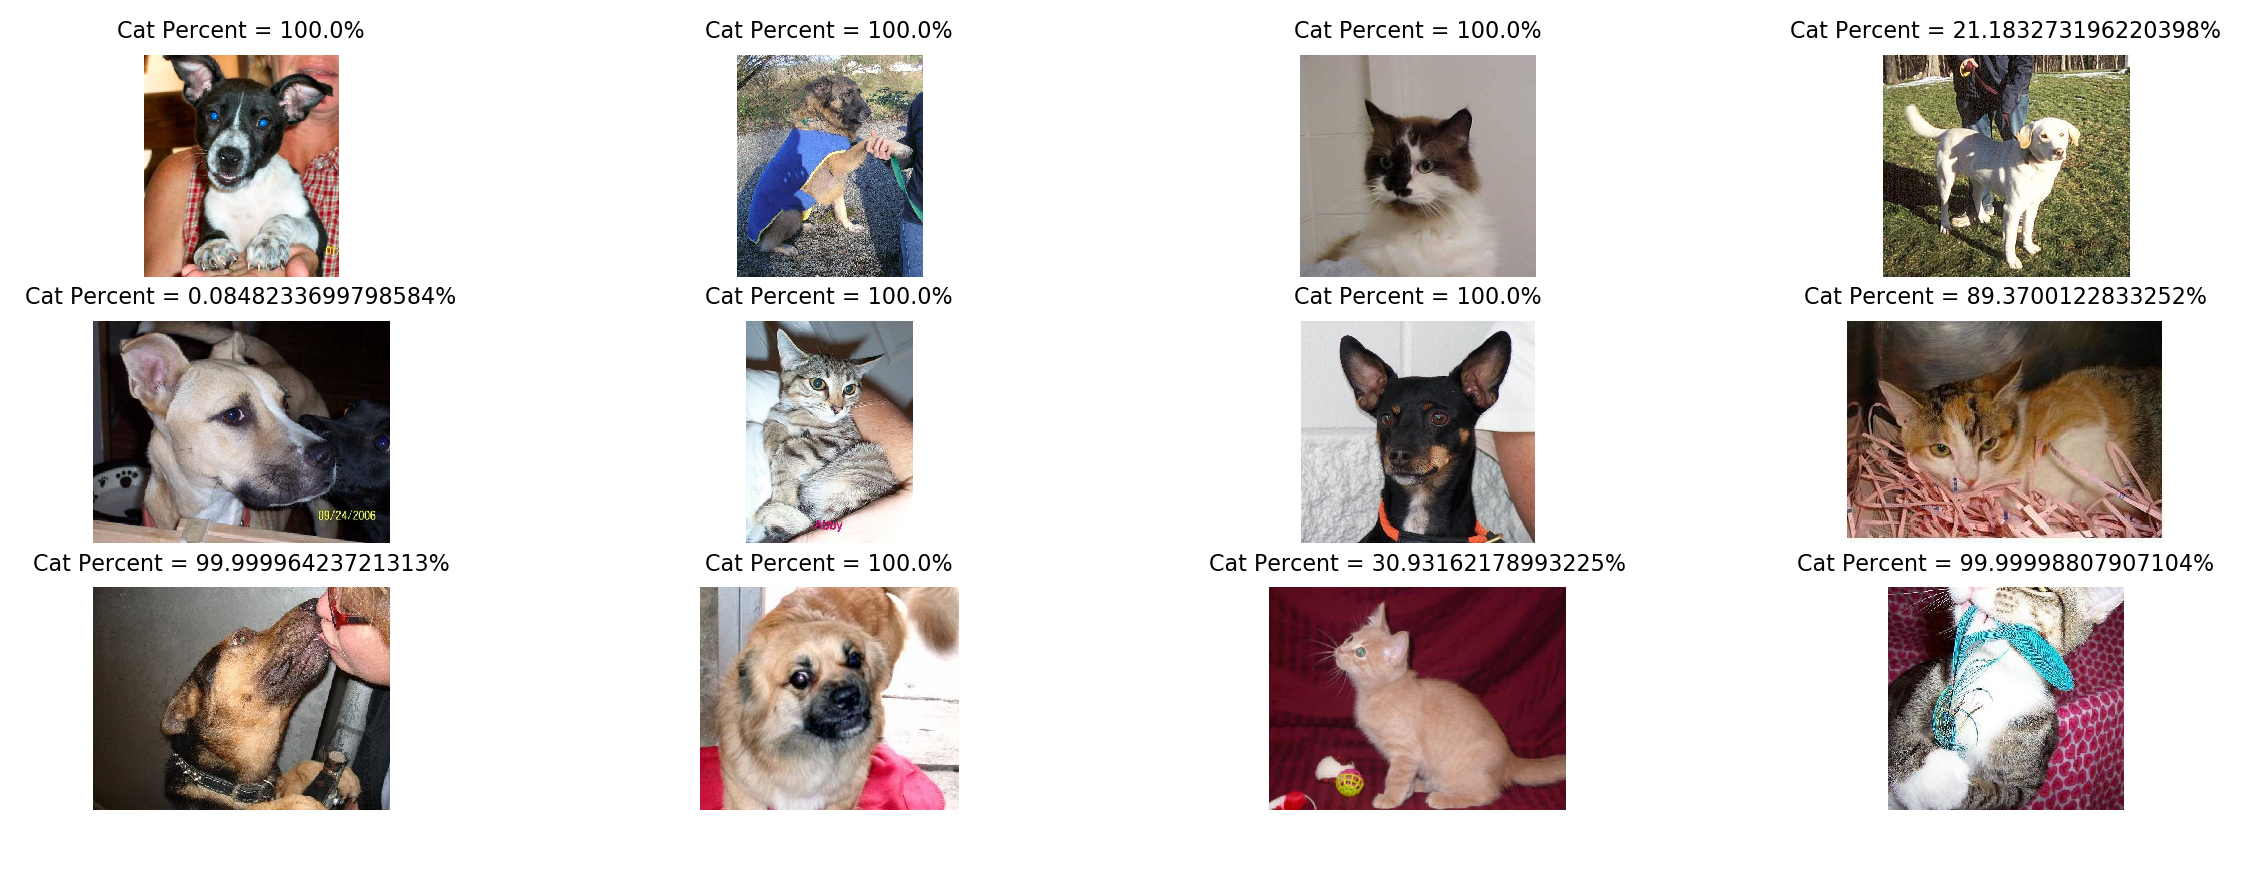

In [42]:
index_rand = []
image = []
my_image = []
fname = []
for i in range(12):
    index = random.choice(range(x_valid_set.shape[0]))
    index_rand.append(index)
    my_image.append(names[index])
    
    fname.append("E:/Acaaaaads/App Physics 186/ML6/train/" + my_image[i])
    image.append(np.array(plt.imread(fname[i])))
#     predict_image(x_valid_set,preds,index)
print(index_rand)
images_g(image, index_rand, preds)
plt.savefig('ML6_2lCNN_classification_lrate_0.001result.png')

In [36]:
for i in range(1,10):
    print('If threshold = %.2f, Accuracy = %.5f' %(0.1*i, accuracy_metric(y_valid_set, preds, 0.1*i)))

If threshold = 0.10, Accuracy = 49.50000
If threshold = 0.20, Accuracy = 49.70000
If threshold = 0.30, Accuracy = 49.60000
If threshold = 0.40, Accuracy = 49.60000
If threshold = 0.50, Accuracy = 49.70000
If threshold = 0.60, Accuracy = 49.60000
If threshold = 0.70, Accuracy = 49.60000
If threshold = 0.80, Accuracy = 49.20000
If threshold = 0.90, Accuracy = 49.60000


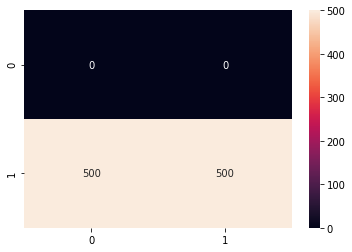

In [37]:
from sklearn.metrics import confusion_matrix

# confusion_matrix(preds, y_valid_set)
data = pd.DataFrame(preds)
data = data.rename(columns = {0:'preds'})
data['actual'] = y_valid_set

pred = np.array(data[['preds']])
actual = np.array(data[['actual']])
actual = actual.reshape(1000,)
pred = pred.reshape(1000,)
pred0 = (pred>0).astype(int)
pred1 = (pred>0.5).astype(int)
pred2 = (pred>0.9).astype(int)

# fig, ax = plt.subplots(1,3, figsize = (15,5))

sns.heatmap(confusion_matrix(pred0, actual), annot=True, fmt='g')
plt.savefig('ML6_2lCNN_th_0_lr_00.1.png')

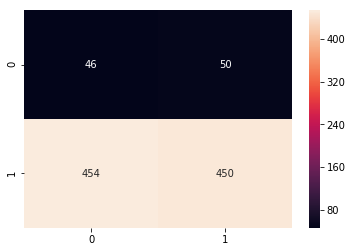

In [38]:
sns.heatmap(confusion_matrix(pred2, actual), annot=True, fmt='g')
plt.savefig('ML6_2lCNN_th_0.9_lr_001.png')

## References:
[1] Convolutional Neural Networks: A Python Tutorial Using TensorFlow and Keras, https://www.kdnuggets.com/2019/07/convolutional-neural-networks-python-tutorial-tensorflow-keras.html

[2] A. Géron, O'Reilly. (2017). Hands-On Machine Learning with Scikit-Learn and TensorFlow.

[3] Source Code: https://github.com/StrikingLoo/Cats-and-dogs-classifier-tensorflow-CNN/blob/master/Convolutional_experiments.ipynb

I would also like to thank Jersey Ganding and Alena Edora for letting me 